# AE
- MVTechADの論文に従って１万枚にデータ拡張
- 300エポック学習

In [2]:
import sys
import glob
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
%matplotlib inline
import scipy.stats as sct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact, fixed
import glob
import pickle
from pprint import pprint
import os
from PIL import Image
from tqdm import tqdm

In [3]:
result_dir = "./dc_img/16"
dirlist = sorted(glob.glob(os.path.join(result_dir, "*")))
classnames = sorted(list(set([os.path.basename(d).split('_')[1] for d in dirlist])))
classnames = [c if c!='metal' else 'metal_nut' for c in classnames]
print(classnames)

['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']


In [4]:
# %%html
# <style>
# div.input {
#     display:none;
# }
# </style>

## AUCの最大値

In [5]:
for c in classnames:
    print("{:<15}".format(c), end=' ')
    eachclass_results = glob.glob(os.path.join(result_dir, "MSE_{c}_128_MSELOSS_digest_10time*".format(c=c)))
    avg = 0
    l = len(eachclass_results)
    print(l, end=' / ')
    for directory in eachclass_results:
        plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
        with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
            # maxauc = np.max(plots_auc["val"][1][:100]) # 100エポックで打ち切り
            maxauc = np.max(plots_auc["val"][1])
            avg += maxauc
            print("{:.3f}".format(maxauc), end=' ')
    if l != 0:
        avg /= l
        print("\t\t\t\t\tavg={:.2f}".format(avg))
    else:
        print("")

bottle          7 / 0.975 0.974 0.978 0.974 0.972 0.973 0.971 					avg=0.97
cable           4 / 0.832 0.816 0.802 0.820 					avg=0.82
capsule         3 / 0.685 0.776 0.756 					avg=0.74
carpet          8 / 0.917 0.932 0.908 0.928 0.890 0.942 0.929 0.936 					avg=0.92
grid            6 / 0.818 0.801 0.814 0.809 0.831 0.852 					avg=0.82
hazelnut        8 / 0.979 0.979 0.949 0.979 0.980 0.972 0.985 0.978 					avg=0.98
leather         6 / 0.829 0.821 0.832 0.769 0.785 0.843 					avg=0.81
metal_nut       6 / 0.612 0.651 0.598 0.607 0.583 0.577 					avg=0.60
pill            8 / 0.815 0.754 0.771 0.770 0.777 0.765 0.727 0.777 					avg=0.77
screw           8 / 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 					avg=1.00
tile            7 / 0.733 0.746 0.733 0.731 0.741 0.730 0.734 					avg=0.74
toothbrush      5 / 0.986 0.992 0.986 0.994 0.994 					avg=0.99
transistor      9 / 0.828 0.822 0.807 0.772 0.819 0.818 0.836 0.750 0.782 					avg=0.80
wood            8 / 0.957 0.957 0.954 0.952 0.96

In [ ]:
## AUCの最終値 (300エポック)

In [ ]:
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

In [ ]:
## AUCの最大値と最終値(300epoch)の比較

In [ ]:
# print("{:<15}\t{}\t{}".format("label", "max", "last"))
# for directory in dirlist:
#     print("{:<15}".format(directory.split('/')[-1][4:-38]), end=' ')
#     plots_auc_name = os.path.join(directory, '0000_plots_auc.pcl')
#     with open(plots_auc_name, 'rb') as f:
#         plots_auc = pickle.load(f)
#         print("{:.2f}".format(np.max(plots_auc["val"][1])), end='\t')
#         print("{:.2f}".format(plots_auc["val"][1][-1]))

## ScrewのAUCのグラフ
- 横軸 : epoch
- 縦軸 : AUC

AEの学習がうまくいっておらず初期値の方が良い例

In [9]:
def plot_graph(screw_dir):
    plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
    with open(plots_auc_name, 'rb') as f:
            plots_auc = pickle.load(f)
    plt.rcParams['figure.figsize'] = (5.0, 5.0)
    plt.figure()
    plt.title('Screw')
    plt.plot(plots_auc["val"][1])

In [18]:
def plot_class(c):
    screw_dirs = glob.glob(os.path.join(result_dir, "*"+c+"*"))
    interact(plot_graph, screw_dir=screw_dirs)

In [19]:
interact(plot_class, c=['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper'])

interactive(children=(Dropdown(description='c', options=('bottle', 'cable', 'capsule', 'carpet', 'grid', 'haze…

<function __main__.plot_class(c)>

## BottleのAUCのグラフ
- 横軸 : epoch
- 縦軸 : AUC

最終値のAUCで問題なさそうな例

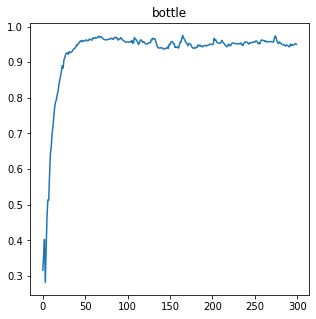

In [42]:
screw_dir = glob.glob(os.path.join(result_dir, "*bottle*"))[0]
plots_auc_name = os.path.join(screw_dir, '0000_plots_auc.pcl')
with open(plots_auc_name, 'rb') as f:
        plots_auc = pickle.load(f)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.figure()
plt.title('bottle')
plt.plot(plots_auc["val"][1])